In [1]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [2]:
center_1 = np.array([4,11])
center_2 = np.array([10,3])
cov1 = [[0.3, 0], [0, 0.3]]
cov2 = [[0.1,0],[0,0.1]]

In [3]:
mean1 = (0, 0)
mean2 = (0, 0)

In [4]:
data_1 = np.random.multivariate_normal(mean1,cov1, 200)+center_1
data_2 = np.random.multivariate_normal(mean2,cov2,200)+center_2
data = np.concatenate((data_1, data_2), axis = 0)
data.shape

(400, 2)

In [5]:
data

array([[ 3.45028455, 10.91618708],
       [ 4.13418713, 10.0688166 ],
       [ 3.29529609, 10.57640618],
       [ 4.0281401 , 11.4174997 ],
       [ 4.59684776, 10.74112687],
       [ 3.65473043, 11.33010318],
       [ 2.77773417,  9.36750928],
       [ 3.8118189 , 10.91235963],
       [ 4.04553311, 10.47881463],
       [ 4.29366409, 10.81199613],
       [ 3.57501181, 11.19608894],
       [ 3.28504094, 10.14732988],
       [ 3.62151666, 10.35240015],
       [ 3.0057788 , 10.57250406],
       [ 4.38845608, 10.94022617],
       [ 4.27757308, 11.1440354 ],
       [ 3.54489078, 10.856371  ],
       [ 4.17094835, 11.05224827],
       [ 3.6155039 , 10.3034184 ],
       [ 4.61676207, 11.64100194],
       [ 4.12380377, 11.40838374],
       [ 4.26032604, 11.11346368],
       [ 4.32259139, 10.74205652],
       [ 4.80588307, 11.34568293],
       [ 3.74106474, 11.64199893],
       [ 2.97706181, 11.6844669 ],
       [ 3.59761561, 11.36418122],
       [ 4.5973209 , 11.01461511],
       [ 3.26547259,

In [6]:
d1=[0]*200+[1]*200

In [7]:
df = pd.DataFrame(data,columns=["x","y"])

In [8]:
df['class']=d1

In [9]:
df.head()

,x,y,class
0,3.450285,10.916187,0
1,4.134187,10.068817,0
2,3.295296,10.576406,0
3,4.028140,11.417500,0
4,4.596848,10.741127,0


In [10]:
df.shape

(400, 3)

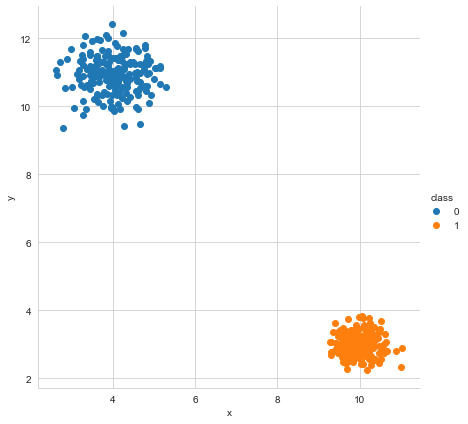

In [11]:
import seaborn as sns

sns.set_style("whitegrid")

sns.FacetGrid(df, hue ="class",
              height = 6).map(plt.scatter,
                              'x',
                              'y').add_legend()

In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
knn = KNeighborsClassifier(n_neighbors=5,
                           p=2, metric='minkowski')

In [14]:
knn.fit(data, d1)

KNeighborsClassifier()

In [15]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [16]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        print("Train Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, clf.predict(X_train))))
        print("Classification Report: \n {}\n".format(classification_report(y_train, clf.predict(X_train))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, clf.predict(X_train))))

        res = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
        
    elif train==False:
        print("Test Result:\n")        
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, clf.predict(X_test))))
        print("Classification Report: \n {}\n".format(classification_report(y_test, clf.predict(X_test))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, clf.predict(X_test))))        

In [17]:
print_score(knn, data, d1, data, d1, train=True)

Train Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       200
           1       1.00      1.00      1.00       200

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400


Confusion Matrix: 
 [[200   0]
 [  0 200]]

Average Accuracy: 	 1.0000
Accuracy SD: 		 0.0000


In [18]:
print(knn.metric_params)

None


In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def plot_decision_boundaries(X, y, model_class, **model_params):
    """
    Function to plot the decision boundaries of a classification model.
    This uses just the first two columns of the data for fitting 
    the model as we need to find the predicted value for every point in 
    scatter plot.
    Arguments:
            X: Feature data as a NumPy-type array.
            y: Label data as a NumPy-type array.
            model_class: A Scikit-learn ML estimator class 
            e.g. GaussianNB (imported from sklearn.naive_bayes) or
            LogisticRegression (imported from sklearn.linear_model)
            **model_params: Model parameters to be passed on to the ML estimator
    
    Typical code example:
            plt.figure()
            plt.title("KNN decision boundary with neighbros: 5",fontsize=16)
            plot_decision_boundaries(X_train,y_train,KNeighborsClassifier,n_neighbors=5)
            plt.show()
    """
    try:
        X = np.array(X)
        y = np.array(y).flatten()
    except:
        print("Coercing input data to NumPy arrays failed")
    # Reduces to the first two columns of data
    reduced_data = X[:, :2]
    # Instantiate the model object
    model = model_class(**model_params)
    # Fits the model with the reduced data
    model.fit(reduced_data, y)

    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = .02     # point in the mesh [x_min, m_max]x[y_min, y_max].    

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    # Meshgrid creation
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh using the model.
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])    

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Predictions to obtain the classification results
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Plotting
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
    plt.xlabel("Feature-1",fontsize=15)
    plt.ylabel("Feature-2",fontsize=15)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    return plt

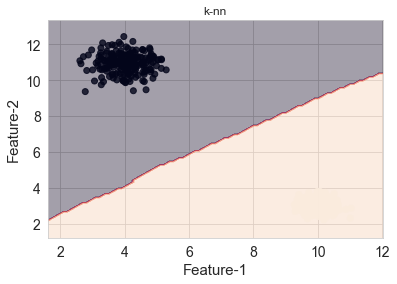

In [20]:
plt.figure()
plt.title("k-nn")
plot_decision_boundaries(data,d1,KNeighborsClassifier)
plt.show()

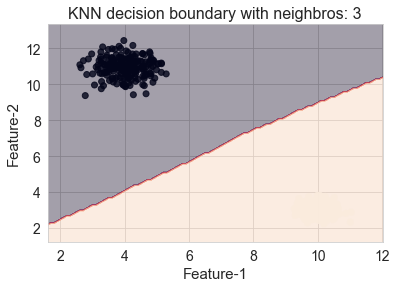

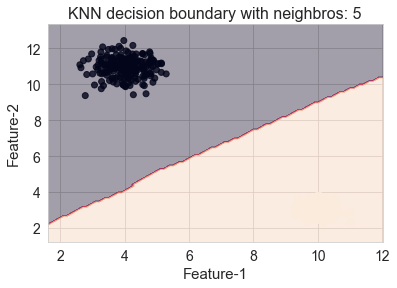

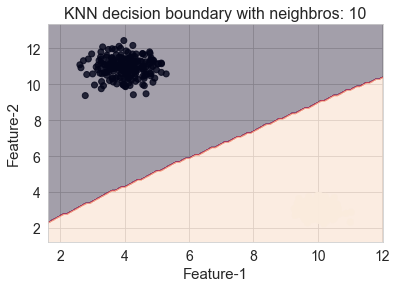

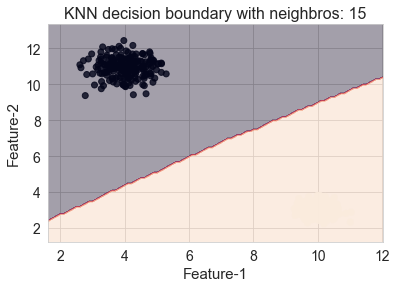

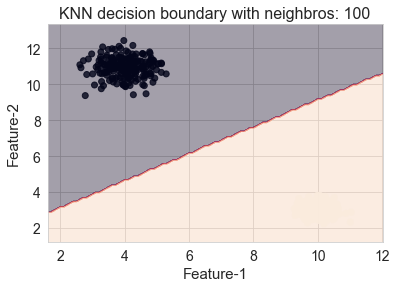

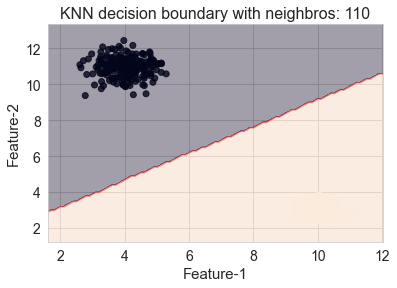

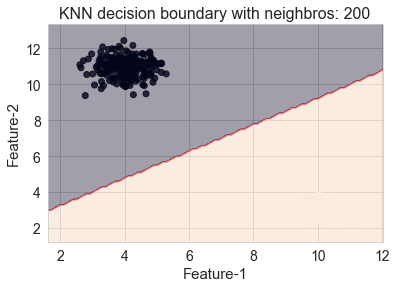

In [25]:
for k in [3,5,10,15,100,110,200]:
    plt.figure()
    plt.title("KNN decision boundary with neighbros: {}".format(k),fontsize=16)
    plot_decision_boundaries(data,d1,KNeighborsClassifier, n_neighbors=k)

In [21]:
knn.get_params

<bound method BaseEstimator.get_params of KNeighborsClassifier()>

In [22]:
KNeighborsClassifier().get_params

<bound method BaseEstimator.get_params of KNeighborsClassifier()>